## PS 3 - Fall 2020 - Week 10: Sampling

This week we will explore the magic of sampling. Software like Python is partiuclarly powerful for asking questions like "if we repeatedly sampled from this population, what would the typical result be?"

We will use one of the data sets which some of you will work with for the final project. The data are on the congressional district level, and contain demographic information, past electoral results, and the results of the 2018 midterm elections (we will try to add 2020 results too!)

Let's start by importing some libraries and the data.

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
# Loading in the data
mid = pd.read_csv('cleaned_midterms.csv')

In [2]:
mid

,District,Dem2018,Rep2018,state,party,voteshare,TRUMP.SCORE,Inc_fname,Inc_lname,inc_year_elected,...,Black,Latino,Asian,Native,Other,BA,BA_WHite,Med_Income,Inc_F,Rep.forecast
0,AK-1,45.8,53.7,AK,R,51.39,93.5,Don,Young,1973 Special,...,3.1,5.4,5.0,13.0,5.6,29.6,36.7,76440,0,51.39
1,AL-1,36.7,63.2,AL,R,65.84,96.8,Bradley,Byrne,2016,...,26.5,1.8,0.9,1.0,1.1,24.0,27.7,47083,0,65.84
2,AL-2,38.4,61.4,AL,R,57.86,96.7,Martha,Roby,2010,...,29.9,1.8,0.7,0.4,1.1,21.8,24.2,42035,1,57.86
3,AL-3,36.0,63.9,AL,R,62.03,96.8,Mike,Rogers,2002,...,25.1,1.7,0.7,0.3,0.9,22.8,23.7,46544,0,62.03
4,AL-4,20.1,79.8,AL,R,76.97,97.8,Robert,Aderholt,1996,...,6.9,1.8,0.5,0.7,1.3,17.0,17.8,41110,0,76.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,WI-7,38.5,60.2,WI,R,58.94,94.4,Sean,Duffy,2010,...,0.5,1.2,1.0,1.8,0.9,23.1,23.4,51738,0,58.94
319,WI-8,36.3,63.7,WI,R,60.91,94.6,Mike,Gallagher,2016,...,1.0,2.2,1.4,2.1,1.0,25.4,26.0,57888,0,60.91
320,WV-1,35.4,64.6,WV,R,62.64,97.8,David,McKinley,2010,...,2.4,0.9,0.6,0.2,0.9,23.5,23.1,45611,0,62.64
321,WV-2,43.0,54.0,WV,R,53.69,84.9,Alex,Mooney,2014,...,3.8,1.3,0.6,0.2,1.6,21.5,21.1,48358,0,53.69


One demographic variable of interest is the percentage of residents in the district who are Black.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f740ccaadc0>]],
      dtype=object)

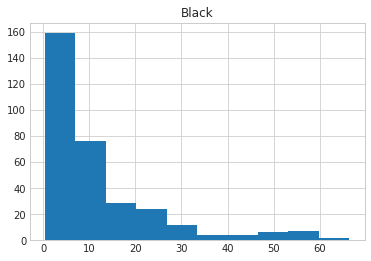

In [3]:
mid.hist("Black")

Many districts have a few if any Black residents, and the numbers generally taper off at higher percentages, though there are a few which are majority Black. 

A similar function which will also plot a nice curve for us is the "distplot" from the Seaborn library:

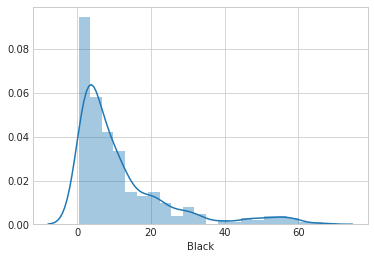

In [4]:
sns.distplot(mid["Black"])

We can compute the mean and median:

In [5]:
np.mean(mid["Black"])

11.792879256965945

In [6]:
np.median(mid["Black"])

7.0

The mean is fairly higher than the median, since the "extreme" observatiosn are all high percentages, which pull the mean upwards.

For what follows, congressional districts will be the "population" we are thinking about. Suppose for some reason we could only get data on a sample of congressional districts. (This isn't too realistic in the US, but in other places without good census data it might be costly to collect demographic data.)

The question we will eventually want to ask is "if we took a sample of the congressional districts and took the mean, what would our best guess and uncertainty be about the mean of the population"?

We can do this with the `.sample()` function, where we put the number of observations to take in parenthesis. This line will draw a sample of 10 observations, whre all have a equal chance of being included:

In [10]:
mid['Black'].sample(10)

202     9.9
0       3.1
91     34.3
220     3.8
310     1.1
207    10.6
37      5.2
12      5.0
217    12.4
169     4.9
Name: Black, dtype: float64

Run it a few times to see that the numbers change.

We can then ask what the mean of a samples is. Run this a few times. You should generally get an answer that is roughly close to the truth (11.8), but frequently off by a few percentage points. 

In [26]:
np.mean(mid['Black'].sample(10))

13.87

What if we took a larger sample of 100? 

In [22]:
np.mean(mid['Black'].sample(100))

12.504000000000001

You should see that the numbers are generally closer to the truth, though there are random fluctuations.

Now lets explore this systematically. What would happen if we took a **lot** of samples, say, 10,000, and each time took the sample mean. We can then study the properties of the 10,000 sample means.

Population mean: 11.792879256965945
Average sample mean: 11.766241


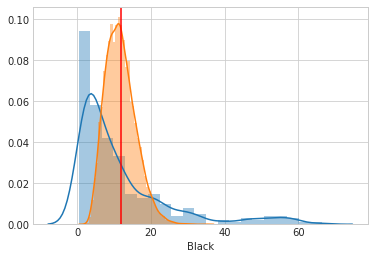

In [27]:
# Setting the sample size to 10; feel free to chance this later!
n = 10
# Telling our random number generator where to start so you get the same answer when running this
np.random.seed(32020)
# Don't worry about the details here: we are taking 10,000 samples and storing the resulting menas
# in an array called "sample_dist"
sample_dist = [np.mean(mid['Black'].sample(n)) for _ in range(10000)]
# Comparing the average sample mean to the population mean, and plotting the distributions
print("Population mean:", np.mean(mid["Black"]))
print("Average sample mean:", np.mean(sample_dist))
sns.distplot(mid['Black'])
sns.distplot(sample_dist)
# Adding a horizontal line at the population mean
plt.axvline(np.mean(mid["Black"]), ymax=1, color='r')


The average sample mean is almost exactly equal to the population mean. So, *on average*, the samples are correct. But individual samples may be off from the truth. How var off?

The blue historgram and curve recreate the population distribution. The red curve is the **distribution of the sample means**. These are generally centered around the truth, which is at the red vertical line, though some are higher than the truth and some are lower. Sometimes we draw some cities with higher Black populations or smaller. 

Now let's compare what happens with samples sizes of 10 vs 100

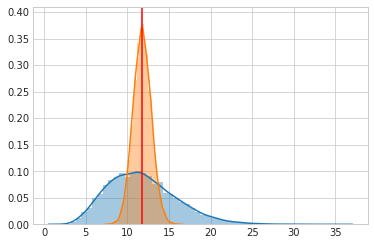

In [28]:
np.random.seed(32020)
# Drawing samples with size 10 and 100
sample_dist10 = [np.mean(mid['Black'].sample(10)) for _ in range(10000)]
sample_dist100 = [np.mean(mid['Black'].sample(100)) for _ in range(10000)]
# Plotting the two distributions
sns.distplot(sample_dist10)
sns.distplot(sample_dist100)
# Making a vertical line at the real population mean
plt.axvline(np.mean(mid["Black"]), ymax=1, color='r')


The blue is the smaller samples (10), and the red is the bigger samples. Both of them are centered around the truth, but with bigger samples the sample means are much more tightly clustered around the truth.

Another more subtle difference is that the blue distribution is slightly asymmetric, while the red one is starting to look "normal"

Now let's try the same thing for different variables. You can plug any variable in to the `varname=` line and see how things look

Population mean: 60716.061919504646
Average sample mean: 60698.425521000005


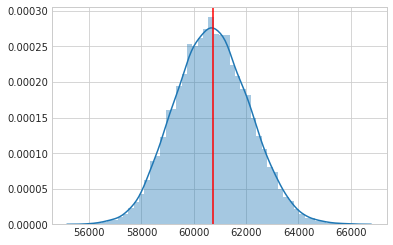

In [29]:
n = 100
varname='Med_Income'
sample_dist = [np.mean(mid[varname].sample(n)) for _ in range(10000)]
print("Population mean:", np.mean(mid[varname]))
print("Average sample mean:", np.mean(sample_dist))
sns.distplot(sample_dist)
plt.axvline(np.mean(mid[varname]), ymax=1, color='r')


What you hopefully found is that no matter what the variable, the sample means are centered around the truth, and have a "mound shaped" distribution. This is the magic of the central limit theorem!

## [OPTIONAL] Checking the Central Limit Theorem

We'll go through this in more detail next week, but we can also check that our formula for confidence does in fact capture the true value 95% of the time

Population mean: 60716.061919504646
Average sample mean: 60697.989776999995
Population SD: 16946.614525577636
Theoretical SE: 1694.6614525577636
SD of sampling distribution: 1699.6504094990594


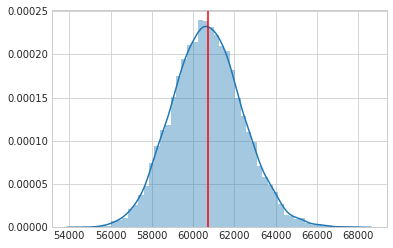

In [3]:
import random
n = 100
varname='Med_Income'
sample_dist = [np.mean(random.choices(mid[varname], k=n)) for _ in range(10000)]
print("Population mean:", np.mean(mid[varname]))
print("Average sample mean:", np.mean(sample_dist))
print("Population SD:", np.std(mid[varname]))
print("Theoretical SE:", np.std(mid[varname])/np.sqrt(n))
print("SD of sampling distribution:", np.std(sample_dist))
sns.distplot(sample_dist)
plt.axvline(np.mean(mid[varname]), ymax=1, color='r')

In [4]:
def in_interval(n=100, varname='Black'):
    sample = random.choices(mid[varname], k=n)
    lower = np.mean(sample) - 1.96*np.std(sample)/np.sqrt(n)
    upper = np.mean(sample) + 1.96*np.std(sample)/np.sqrt(n)
    return 1*(np.mean(mid[varname]) > lower)*(np.mean(mid[varname]) < upper)


In [5]:
in_interval()

0

In [6]:
in95 = [in_interval(n=100, varname="Dem2018") for _ in range(10000)]
np.mean(in95)

0.9429